In [2]:
import pandas as pd
import numpy as np

#### 이상치 데이터 구하기

In [3]:
df = pd.read_csv('./archive/train.csv')

In [4]:
print(df.shape)
print(df.isnull().sum())

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# IQR 구하기
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)

IQR = Q3 - Q1
print(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

-26.724 65.6344


In [7]:
out1 = df[df['Fare'] < (Q1 - 1.5 * IQR)]
out2 = df[df['Fare'] > (Q3 + 1.5 * IQR)]

In [8]:
out2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [9]:
sum(out2['Sex'] == 'female')

70

##### 소수점 나이
- 올림 : np.ceil()
- 내림 : np.floor()
- 버림 : np.trunc()

In [10]:
df = pd.read_csv('./archive/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [11]:
df = df[(df['age'] - np.floor(df['age'])) != 0]
df

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [12]:
age_c = np.ceil(df['age']).mean()
age_f = np.floor(df['age']).mean()
age_t = np.trunc(df['age']).mean()

In [13]:
print(age_c, age_f, age_t)
print(age_c + age_f + age_t)

23.75 22.75 23.0
69.5


#### 결측치 처리

In [14]:
df = pd.read_csv('./archive/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [15]:
# 결측값 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [16]:
df.shape

(100, 8)

In [17]:
df = df.drop(['f3'], axis=1)

In [18]:
df['city'].unique()

array(['서울', '부산', '대구', '경기'], dtype=object)

In [19]:
s_med = df[df['city']=='서울']['f1'].median()
b_med = df[df['city']=='부산']['f1'].median()
d_med = df[df['city']=='대구']['f1'].median()
k_med = df[df['city']=='경기']['f1'].median()

In [20]:
df['f1'] = df['f1'].fillna(df['city'].map({'서울':s_med, '대구':d_med, '부산':b_med, '경기':k_med}))

In [21]:
df.isnull().sum()

id      0
age     0
city    0
f1      0
f2      0
f4      0
f5      0
dtype: int64

In [22]:
df['f1'].mean()

65.52

#### 왜도(Skewness), 첨도(Kurtosis) 구하기 + 로그변환

In [25]:
df = pd.read_csv('./archive/house_prices.csv')

In [27]:
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:>

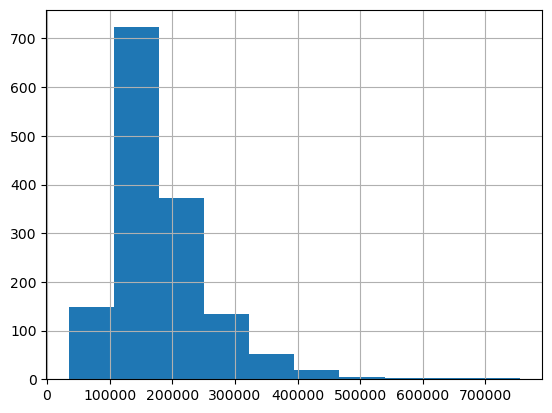

In [28]:
df['SalePrice'].hist()

In [29]:
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print('왜도 : ', s1)
print('첨도 : ', k1)

왜도 :  1.8828757597682129
첨도 :  6.536281860064529


<AxesSubplot:>

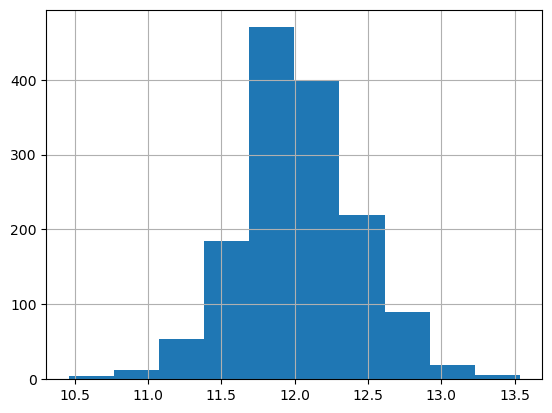

In [30]:
df['SalePrice'] = np.log1p(df['SalePrice'])
df['SalePrice'].hist()

In [31]:
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
print('왜도 : ',s2)
print('첨도 : ',k2)

왜도 :  0.12134661989685333
첨도 :  0.809519155707878


In [32]:
print(round(s1+s2+k1+k2,2))

9.35


In [33]:
df = pd.read_csv('./archive/basic1.csv')
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [34]:
enfj_std = df[df['f4']=='ENFJ']['f1'].std()
infp_std = df[df['f4']=='INFP']['f1'].std()

In [35]:
print(np.abs(enfj_std - infp_std))

5.859621525876811


#### 결측치 제거 및 그룹 합계
- 주어진 데이터 중 basic1.csv에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오.

In [36]:
df = pd.read_csv('./archive/basic1.csv')
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [40]:
df1 = df[~df['f1'].isnull()]

In [41]:
df2 = df1.groupby(['city', 'f2']).sum()
df2

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [43]:
print(df2.iloc[0]['f1'])

833.0


#### 값 변경 및 2개 이상의 조건
- 'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고, 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오.

In [44]:
df = pd.read_csv('./archive/basic1.csv')
df[df['f4']=='ESFJ']

,id,age,city,f1,f2,f3,f4,f5
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
12,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
30,id31,86.0,부산,77.0,0,NaN,ESFJ,73.586397
58,id59,64.0,대구,NaN,1,NaN,ESFJ,20.129444
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [45]:
df['f4'] = df['f4'].replace('ESFJ', 'ISFJ')

In [49]:
df[(df['f4']=='ISFJ')&(df['city']=='경기')]['age'].max()

90.0

#### 누적합 및 보간 (결측치 처리)
- 주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다. 이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고, 누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)

##### Hint
- fillna()
    - bfill : 바로 뒤값으로 채워넣는 방법
    - pad : 이전값으로 채워넣는 방법

In [50]:
df = pd.read_csv('./archive/basic1.csv')

In [56]:
df2 = df[df['f2']==1]['f1'].cumsum()
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16       NaN
19     534.0
20       NaN
21     606.0
22     681.0
25     738.0
27     772.0
33       NaN
35     849.0
37       NaN
46     924.0
49    1002.0
51    1084.0
53       NaN
55       NaN
58       NaN
62    1170.0
65       NaN
66    1222.0
69    1318.0
72       NaN
77    1414.0
80    1464.0
82    1514.0
86       NaN
88    1580.0
91    1658.0
93       NaN
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [57]:
df2 = df2.fillna(method='bfill')
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16     534.0
19     534.0
20     606.0
21     606.0
22     681.0
25     738.0
27     772.0
33     849.0
35     849.0
37     924.0
46     924.0
49    1002.0
51    1084.0
53    1170.0
55    1170.0
58    1170.0
62    1170.0
65    1222.0
66    1222.0
69    1318.0
72    1414.0
77    1414.0
80    1464.0
82    1514.0
86    1580.0
88    1580.0
91    1658.0
93    1701.0
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [59]:
print(df2.mean())

980.3783783783783
